# Earthquake Lab

PLEASE NOTE: This notebook is running remotely, and will timeout after extended inactivity which will mean your work will be lost. When you finish this lab, or want to take a break DOWNLOAD THIS FILE SO THAT YOUR WORK IS SAVED. 

Download as follows:

Under the File menu in the upper left select 'Download as', and then 'Notebook (.ipybn)'. Your file will download to your computer. A new browser window may open, which is fine (you can close it). 

## Lab introduction

This lab will explore interesting patterns of seismicity in the central part of New Mexico, where we will be next week. 

Remember, like the previous lab, you can run each cell in this notebook by typing Shift + Enter

## Names of students

List all students in lab group. Type in the cell below, then type Shift + Enter to "run" your text

In [3]:
# Import libraries for use later on
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import csv
import datetime
from mpl_toolkits.basemap import Basemap
import urllib.request as urllib2

## Import earthquke data

In [8]:
eq_url = "https://raw.githubusercontent.com/kgo2105/Earthquake_lab/master/nm_eqs.txt"
response = urllib2.urlopen(eq_url)
data = np.loadtxt(response, delimiter= '\t')


# Pull out each variable
date = [int(row[0]) for row in data]
lat = [float(row[1]) for row in data]
lon = [row[2] for row in data]
depth = [row[3] for row in data]
mag = [row[4] for row in data]

In [10]:
# Look at data set
# Columns are: Date, eq lat

# this kind of sucks because of the sci notation

print(data[0])

[ 2.0141227e+07  3.4044000e+01 -1.0695300e+02  5.0000000e+00
  8.8000000e-01]


## Import geographic data to draw map

In [11]:
ssa_url = "https://raw.githubusercontent.com/kgo2105/Earthquake_lab/master/socorro_outline.txt"
response = urllib2.urlopen(ssa_url)
ssa = np.loadtxt(response, delimiter= ',')

# Coordinates of the Socorro Seismic Anomaly outline
ssa_lat = [row[1] for row in ssa]
ssa_lon = [row[0] for row in ssa]

In [15]:
# Look at the data to confirm that it contains latitude and longitude data

# Print first 10 lines of the data (i.e., lines number 0 to 9) in the variable 'ssa'
# First column is longitude, second column is latitude

print(ssa[0:9])

[[-106.67    34.433]
 [-106.67    34.421]
 [-106.66    34.404]
 [-106.66    34.394]
 [-106.65    34.387]
 [-106.65    34.377]
 [-106.64    34.367]
 [-106.64    34.356]
 [-106.63    34.346]]


In [16]:
topo_url = "https://raw.githubusercontent.com/kgo2105/Earthquake_lab/master/etopo1_bedrock.txt"
response = urllib2.urlopen(topo_url)

# Read header (number of columns and rows, cell-size, and lower left coordinates)
ncols = int(response.readline().split()[1])
nrows = int(response.readline().split()[1])
xllcorner = float(response.readline().split()[1])
yllcorner = float(response.readline().split()[1])
cellsize = float(response.readline().split()[1])

# Read in topography as a whole, disregarding first five rows (header)
etopo = np.loadtxt(response, skiprows = 0)

# Data resolution is quite high. I decrease the data resolution 
# to decrease the size of the final figure
dres = 2

# Swap the rows
etopo[:nrows+1, :] = etopo[nrows+1::-1, :]
etopo = etopo[::dres, ::dres]

# Create longitude and latitude vectors for etopo
lons = np.arange(xllcorner, xllcorner+cellsize*ncols, cellsize)[::dres]
lats = np.arange(yllcorner, yllcorner+cellsize*nrows, cellsize)[::dres]

# Draw a map of New Mexico

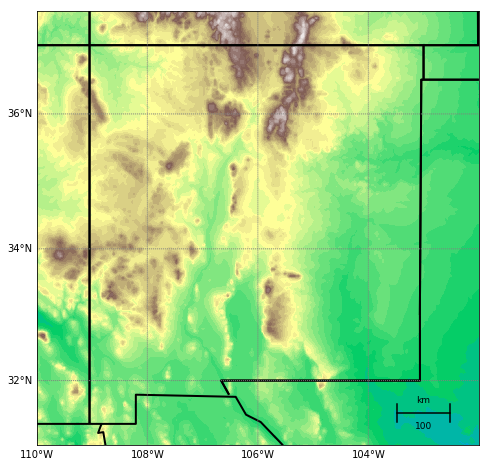

In [30]:
# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))

#not using these two lines of code
# mapfig, myAx = plt.subplots()
# myAx.plot([1,2,3])


m = Basemap(llcrnrlon=-110.,llcrnrlat=31.,urcrnrlon=-102.,urcrnrlat=37.5,\
            resolution='l',projection='merc',\
            lat_0=40.,lon_0=-20.,lat_ts=20.)

# Convert etopo1 coordinates lon/lat in ° to x/y in m
# (From the basemap help: Calling a Basemap class instance with the arguments
# lon, lat will convert lon/lat (in degrees) to x/y map projection coordinates
# (in meters).)
rlons, rlats = m(*np.meshgrid(lons,lats))

# Draw etopo1, first for land and then for the ocean, with different colormaps
llevels = np.arange(-100,4100,100) # check etopo.ravel().max()
lcs = m.contourf(rlons, rlats, etopo, llevels, cmap=plt.cm.terrain)
olevels = np.arange(-3500,1,100) # check etopo.ravel().min()
cso = m.contourf(rlons, rlats, etopo, olevels, cmap=plt.cm.ocean)

# #m.shadedrelief()
m.drawparallels(np.arange(30,40,2),labels=[1,0,0,0], color = 'grey')
m.drawmeridians(np.arange(-110,-102,2),labels=[0,0,0,1], color = 'grey')
m.drawstates(color = 'black', linewidth = 2)
m.drawcountries(color='black', linewidth = 2)

# Add scale to map
m.drawmapscale(-103, 31.5, -106, 32, 100, barstyle='simple', units='km', fontsize=9, yoffset=None, labelstyle='simple', fontcolor='k', fillcolor1='w', fillcolor2='k',format='%d')

%config InlineBackend.close_figures=False # keep figures open in pyplot

# Now plot earthquakes in NM

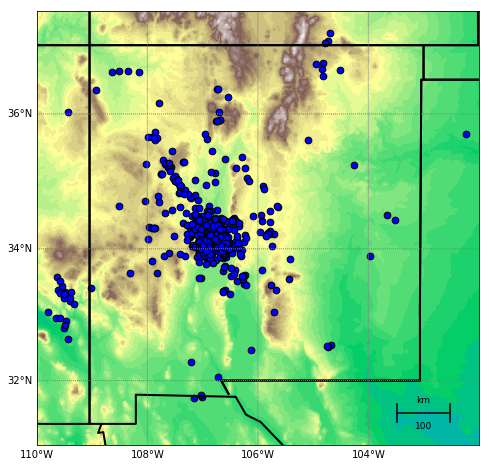

In [31]:
m.scatter(lon,lat, latlon = True, s = 45, edgecolor = 'black', facecolor = 'blue')


## Describe any patterns in the seismicity

Where are there notable concentrations? Absences? Is there any relationship with topography?

Introduce SSA

## Now plot the outline of the Socorro Seismic Anomaly

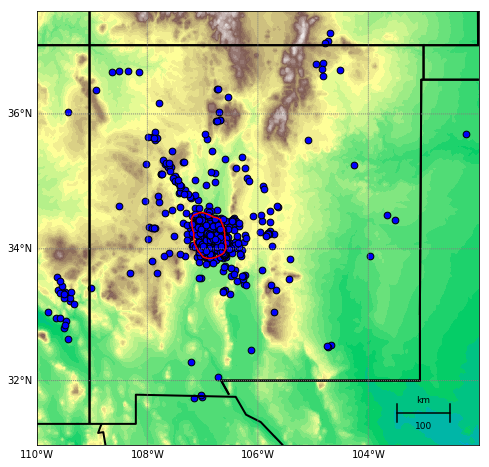

In [32]:
m.plot(ssa_lon,ssa_lat, latlon=True, color = 'r', linewidth = 1.5)


# Question 2

## Plot the earthquake data by depth

(20, 0)

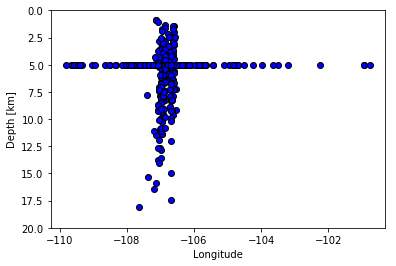

In [72]:
plt.figure()
plt.scatter(lon,depth, color = 'blue', edgecolor = 'black')
plt.xlabel('Longitude')
plt.ylabel('Depth [km]')
plt.ylim(20,0)

# Make point about data quality check


Text here

Omit depths = 5 km


Text(0.5,0,'Longitude')

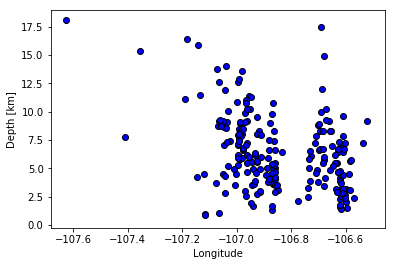

In [34]:
plt.figure()
for i in data:
    if i[3] != 5.0: #does not equal
        plt.scatter(i[2],i[3], color = 'blue', edgecolor = 'black')
plt.ylabel('Depth [km]')
plt.xlabel('Longitude')

# Plot by date

Text(0.5,0,'Year')

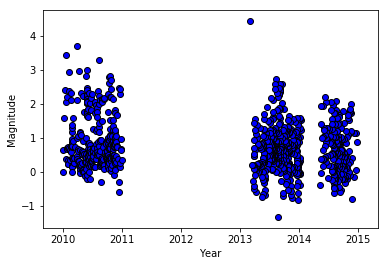

In [78]:
# Format dates
ymd = []
for i in range(len(date)):
    ymd.append(datetime.datetime.strptime(str(date[i]),'%Y%m%d'))

# plot of magnitude
plt.figure()
plt.scatter(ymd,mag, edgecolor = 'black',color = 'blue')
plt.ylabel('Magnitude')
plt.xlabel('Year')

 Have them plot some new kind of scatter plot and chance colors, etc.